In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens')
from importlib import reload
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import default_cosmology
from astropy import units
import astropy
import time

import psutil
from distributed.utils import format_bytes

#only for python3
import importlib
reload=importlib.reload

In [2]:
%matplotlib inline
import matplotlib
# matplotlib.use('SVG')   # generate postscript output by default

# from matplotlib import rc
# rc('text', usetex=False) 

In [3]:
10000*3600/1.e6

36.0

In [4]:
from skylens import *
# from fisher import *
from skylens.PCA_shear import *

In [5]:
# import survey_utils
# reload(survey_utils)
from skylens.survey_utils import *

In [6]:
fig_home='./figures/'
fig_format='pdf'

In [7]:
log(5000)/log(1000)

1.2329900014453397

In [8]:
fname='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/cl_cov_win_win32_binnedL_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
# fname2='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher//cl_cov_win_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
# fname3='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher//cl_cov_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
# fname='../tests/fisher/fisher_2_2_4_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
with open(fname,'rb') as of:
    cov_cl=pickle.load(of)
# with open(fname2,'rb') as of:
#     cov_cl2=pickle.load(of)
# with open(fname3,'rb') as of:
#     cov_cl3=pickle.load(of)

In [12]:
cov_cl['z_bins']['shear_zbins']['n_bins']+cov_cl['z_bins']['shear_zbins_train']['n_bins']

10

In [15]:
cov_cl['z_bins']['galaxy_zbins']['n_bins']+cov_cl['z_bins']['galaxyD_zbins']['n_bins']

22

In [16]:
cc=cov_cl['cl_L']['cov'].todense()

In [17]:
error=np.sqrt(np.diag(cc))
corr=cc/np.outer(error,error)

In [18]:
error.shape[0]/11

363.0

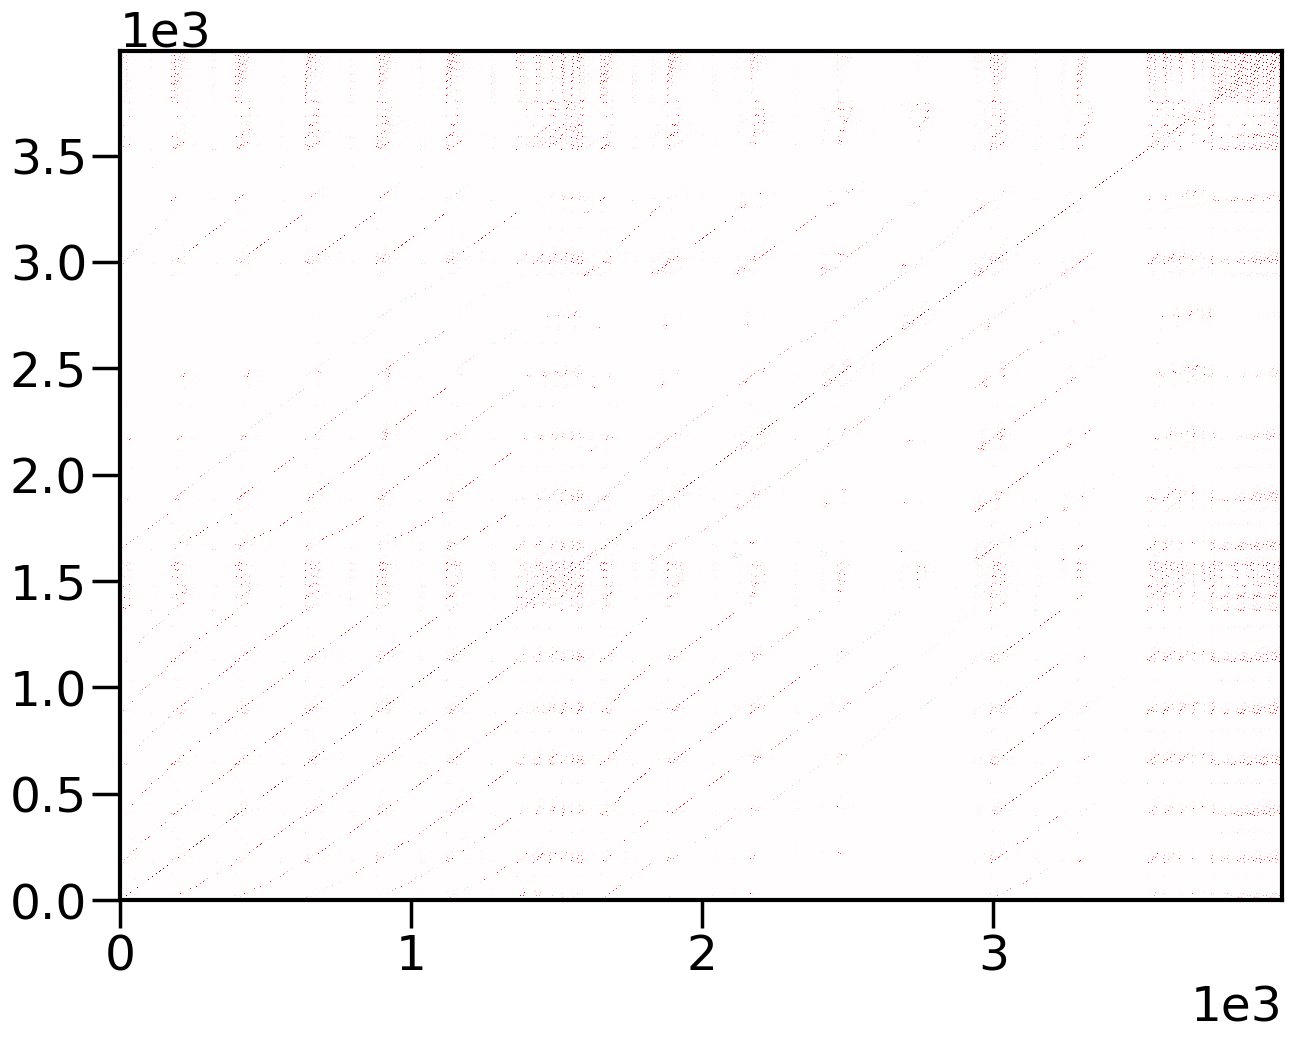

In [19]:
pcolor(corr,vmin=-1,vmax=1,cmap='seismic')
show()

In [20]:
nst=32
mm=np.random.uniform(size=hp.nside2npix(nst))
%time cc=hp.anafast(mm)

CPU times: user 335 ms, sys: 92.1 ms, total: 427 ms
Wall time: 37.2 ms


In [23]:
home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/'
# fname='cl_cov_win_binned_2_1_2_4_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
fname='cl_cov_win_win1024_binnedL_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150_NT1000000.pkl'
fname2='cl_cov_win_win1024_binnedL_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT1500_NT1000000.pkl'
# fname3='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/cl_cov_2_1_2_4_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
# fname='../tests/fisher/fisher_2_2_4_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
with open(home+fname,'rb') as of:
    cov_cl=pickle.load(of)
with open(home+fname2,'rb') as of:
    cov_cl2=pickle.load(of)
# with open(fname3,'rb') as of:
#     cov_cl3=pickle.load(of)

In [24]:
corr_ggl=('galaxy','shear')
corr_gg=('galaxy','galaxy')
corr_ll=('shear','shear')

In [25]:
# fname='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/win_binned_2_1_2_4_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
# fname2='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/win_2_1_2_4_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
fname='win_win1024_binnedL_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT1500_NT1000000.pkl'
fname2='win_win1024_binnedL_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150_NT1000000.pkl'
with open(home+fname,'rb') as of:
    win=pickle.load(of)
with open(home+fname2,'rb') as of:
    win2=pickle.load(of)

In [26]:
cov_cl2['z_bins']['f_sky'][corr_gg][(0,0)]

0.3636101881663005

In [27]:
win['full']['cl'][corr_gg][0,0].keys()

dict_keys(['corr', 'indxs', 12, 'binning_util', 'bin_wt', 'W_pm', 's1s2', 'M', 'M_noise'])

In [28]:
l0=np.arange(50,1000)
l_bins=np.int64(np.logspace(np.log10(50),np.log10(1000),12))
lb=0.5*(l_bins[1:]+l_bins[:-1])
dl=l_bins[1:]-l_bins[:-1]
b_norm=1./(dl/lb)/.3

In [29]:
b_norm

array([11.875     , 11.98412698, 12.28395062, 12.42857143, 12.16312057,
       12.32240437, 12.33333333, 12.33333333, 12.24220624, 12.3480663 ,
       12.28033473])

[]

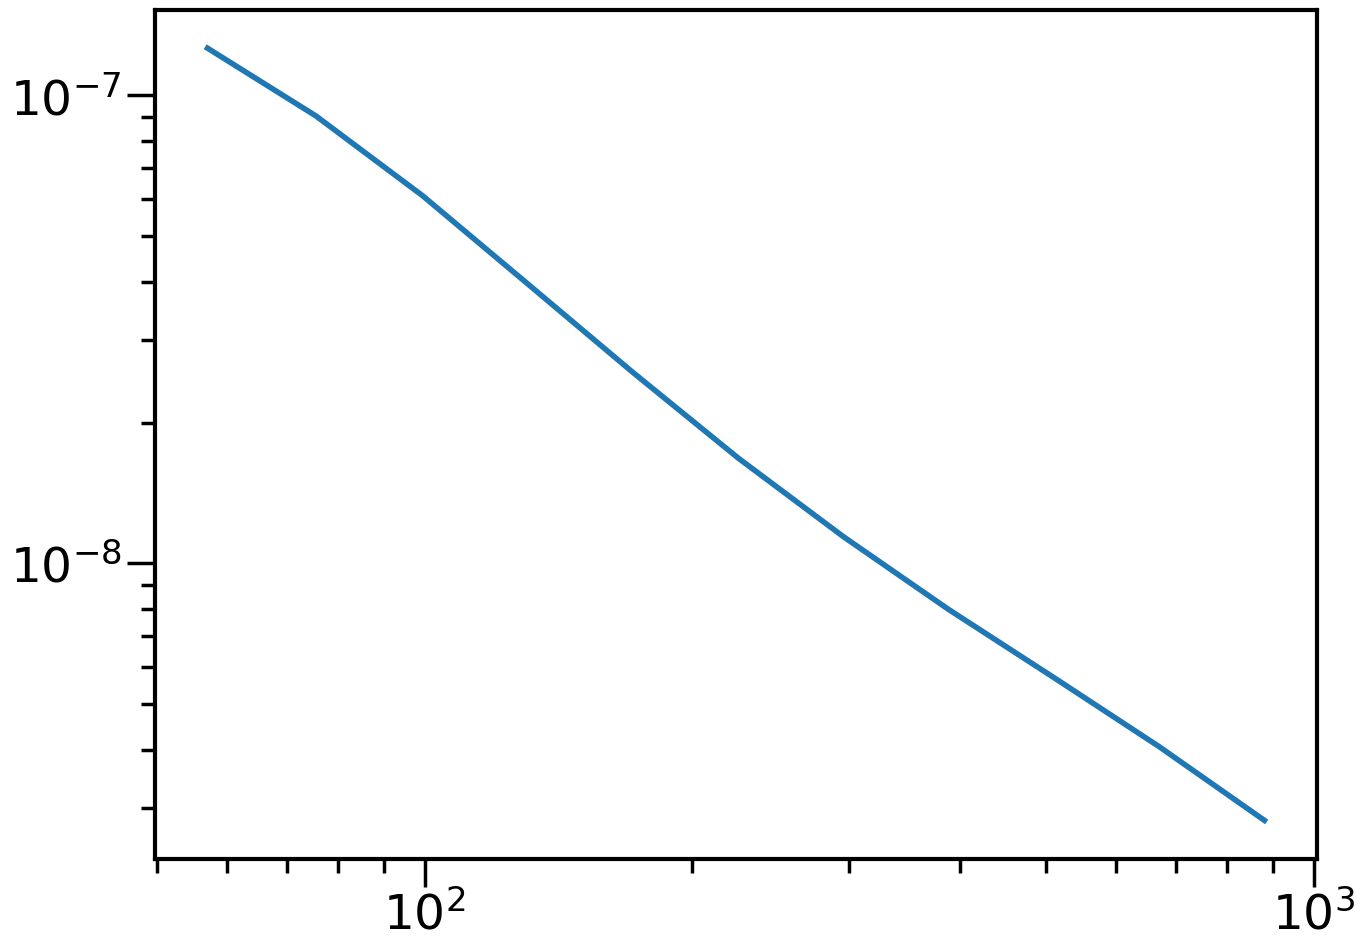

In [31]:
# plot(l0,win['full']['cl'][corr_gg][0,0]['bin_wt']['wt0'])
plot(lb,1./win['full']['cl'][corr_gg][0,0]['bin_wt']['wt_b'])
loglog()

[]

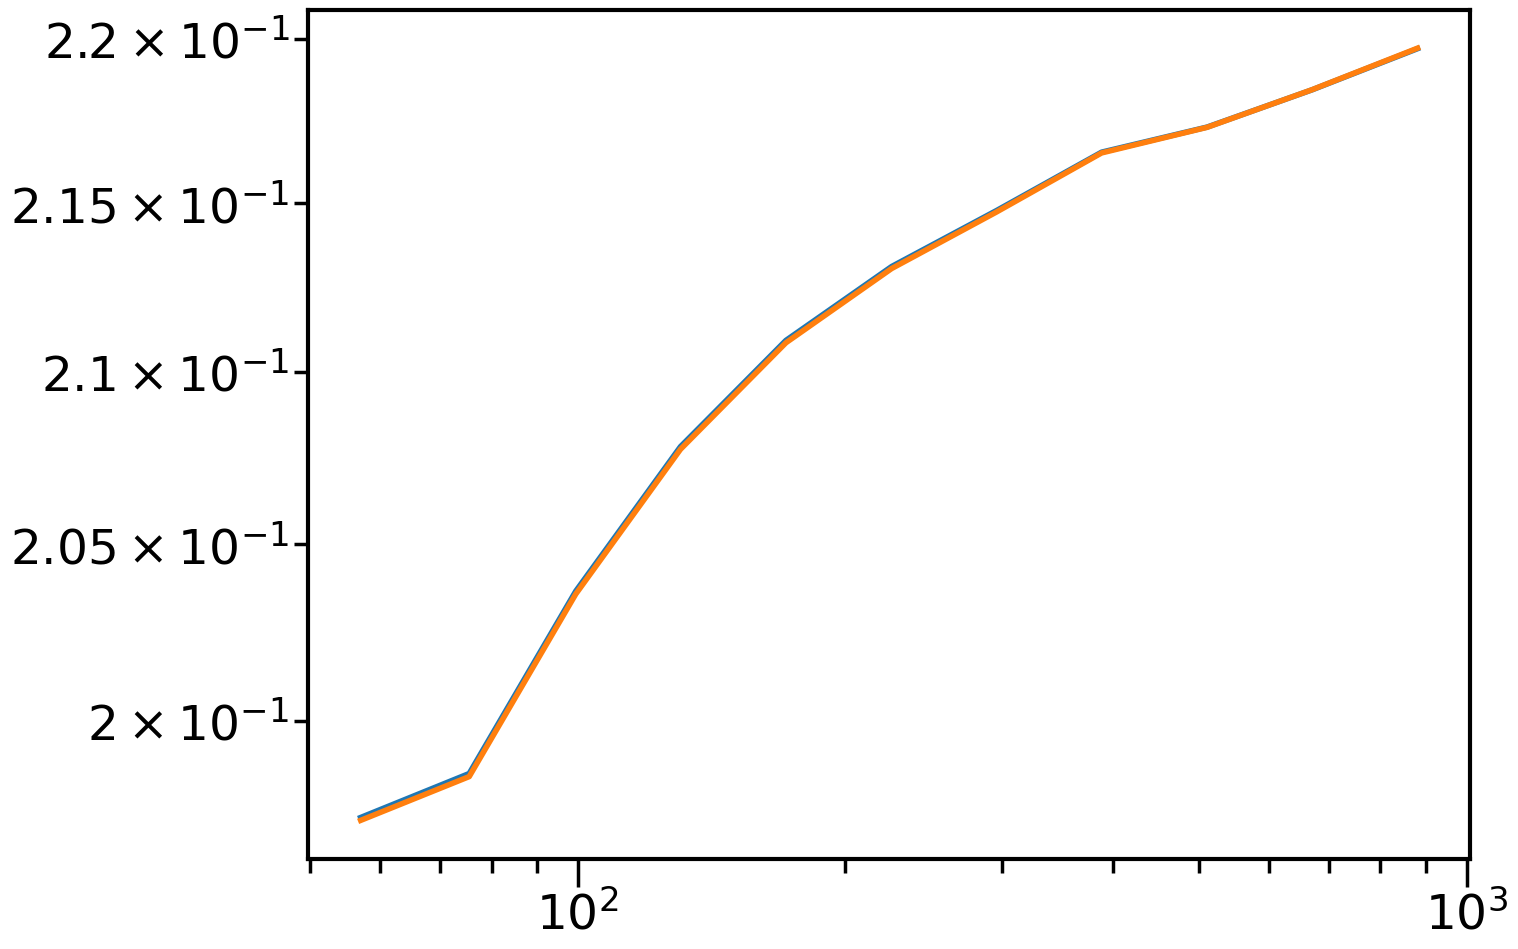

In [32]:
plot(lb,np.diag(win2['full']['cl'][corr_gg][0,0]['M']))
plot(lb,np.diag(win['full']['cl'][corr_gg][0,0]['M']))
loglog()

In [33]:
cov_cl3['cl_L']['pcl_b'].shape,cov_cl2['cl_L']['pcl_b'].shape,cov_cl['cl_L']['pcl_b'].shape

NameError: name 'cov_cl3' is not defined

In [39]:
cov_cl['cl_L']['pcl_b']/cov_cl2['cl_L']['pcl_b']

<ipython-input-39-cc2ea78e03a1>:1: RuntimeWarning: invalid value encountered in true_divide
  cov_cl['cl_L']['pcl_b']/cov_cl2['cl_L']['pcl_b']


array([1.0105989 , 1.01146885, 1.01168984, ..., 0.99988566, 1.00013927,
       0.9999883 ])

[]

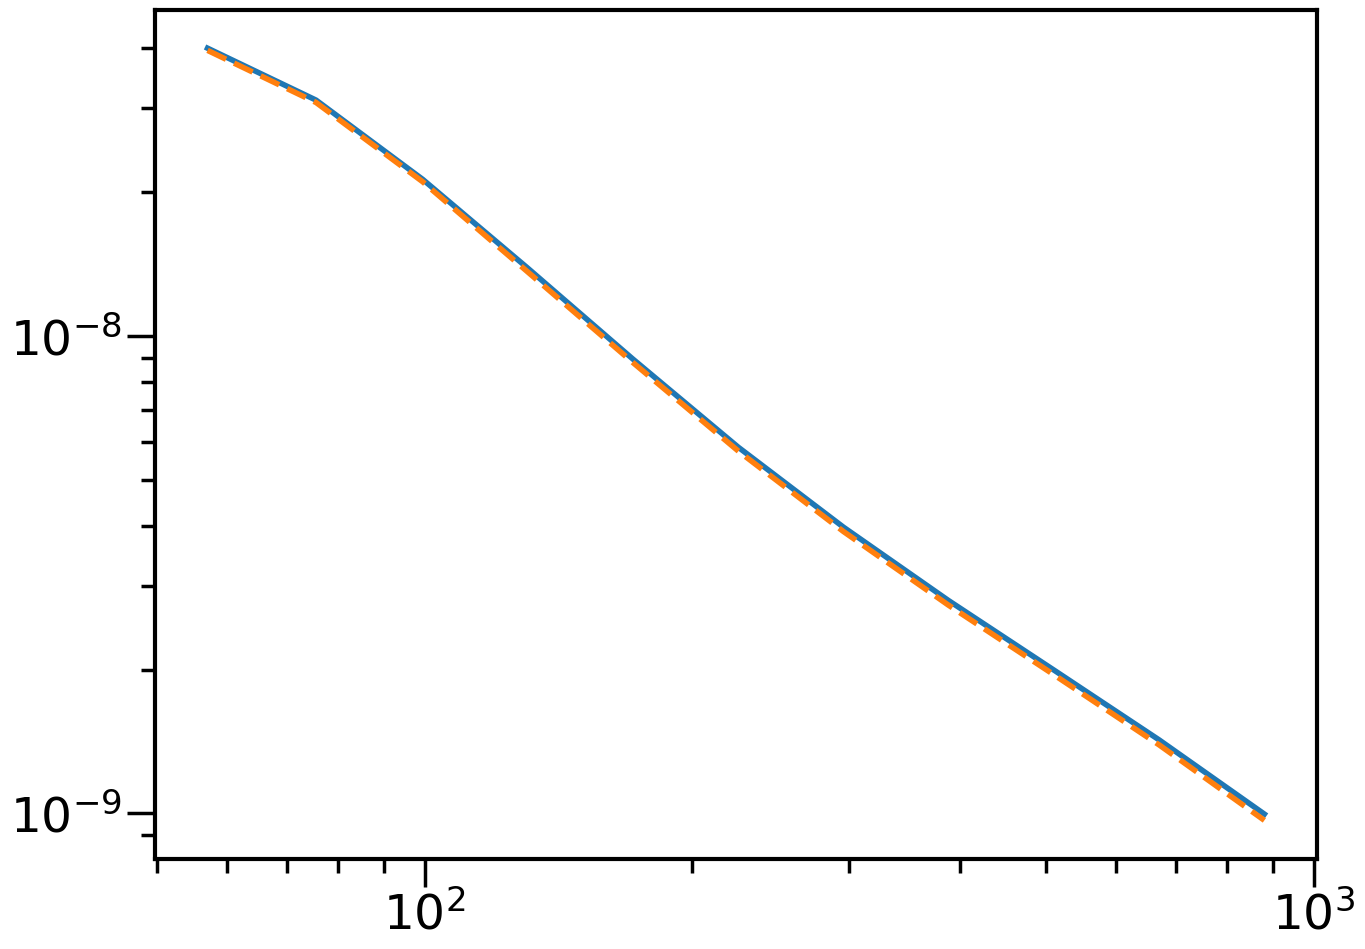

In [37]:
plot(lb,cov_cl['cl_L']['pcl_b'][0:11])
# plot(lb,cov_cl3['cl_L']['pcl_b'][0:11])
plot(lb,cov_cl2['cl_L']['pcl_b'][0:11],'--')
loglog()

In [40]:
np.pi/.3

10.471975511965978

In [ ]:
# plot(cov_cl['cl_L']['pcl_b'][0:12])
plot(cov_cl3['cl_L']['pcl_b']/cov_cl2['cl_L']['pcl_b'])
# loglog()

In [ ]:
cov_cl['cl_L']['pcl_b'].shape

In [55]:
# fname='../tests/fisher/fisher_5_5_17_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
# fname='../tests/fisher/fisher_2_2_4_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
fname='fisher_win_win1024_binnedL_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150_NT1000000.pkl'
# fname='fisher_5_5_17_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
with open(home+fname,'rb') as of:
    fishes=pickle.load(of)

In [56]:
fishes.keys()

dict_keys(['priors', 'f_all', 'f_nz_all', 'f_nz_bz_all', 'cov_file', 'cosmo_fid'])

In [57]:
# f_nz_all_lsst=fishes['f_nz_all_lsst']
# f_nz0=fishes['f_nz0']
f_nz_all=fishes['f_nz_all']


In [58]:
import plot_fisher_tool
reload(plot_fisher_tool)
from plot_fisher_tool import *

In [59]:
f_nz_all.keys()

dict_keys(['cov_p_inv', 'params_all', 'params_missing', 'prior', 'cov_deriv', 'model_deriv', 'cov', 'cov_inv', 'model', 'x_vars', 'params'])

In [60]:
x=np.isfinite(f_nz_all['cov'])
x.mean()

1.0

In [61]:
fishes.keys()

dict_keys(['priors', 'f_all', 'f_nz_all', 'f_nz_bz_all', 'cov_file', 'cosmo_fid'])

In [63]:
f_nz_all['x_vars']#['Om']

{'Ase9': array([2.178, 2.222]),
 'nz_s_0_0': array([0.77500984, 0.79066661]),
 'nz_s_0_1': array([2.07642533, 2.11837332]),
 'nz_s_0_2': array([2.85876417, 2.91651699]),
 'nz_s_0_3': array([2.72472185, 2.77976674]),
 'nz_s_0_4': array([1.1393793 , 1.16239706]),
 'nz_s_0_5': array([0.12122521, 0.12367421]),
 'nz_s_0_6': array([0.00246457, 0.00251436]),
 'nz_s_0_7': array([-0.01,  0.01]),
 'nz_s_0_8': array([-0.01,  0.01]),
 'nz_s_0_9': array([-0.01,  0.01]),
 'nz_s_0_10': array([-0.01,  0.01]),
 'nz_s_0_11': array([-0.01,  0.01]),
 'nz_s_0_12': array([-0.01,  0.01]),
 'nz_s_0_13': array([-0.01,  0.01]),
 'nz_s_0_14': array([-0.01,  0.01]),
 'nz_s_0_15': array([-0.01,  0.01]),
 'nz_s_0_16': array([-0.01,  0.01]),
 'nz_s_0_17': array([-0.01,  0.01]),
 'nz_s_0_18': array([-0.01,  0.01]),
 'nz_s_0_19': array([-0.01,  0.01]),
 'nz_s_0_20': array([-0.01,  0.01]),
 'nz_s_0_21': array([-0.01,  0.01]),
 'nz_s_0_22': array([-0.01,  0.01]),
 'nz_s_0_23': array([-0.01,  0.01]),
 'nz_s_0_24': array(

In [64]:
error=np.sqrt(np.diag(f_nz_all['cov']))
corr=f_nz_all['cov']/np.outer(error,error)
error.shape

In [66]:
np.linalg.det(f_nz_all['cov_p_inv'])

0.0

In [68]:
f_nz_all.keys()

dict_keys(['cov_p_inv', 'params_all', 'params_missing', 'prior', 'cov_deriv', 'model_deriv', 'cov', 'cov_inv', 'model', 'x_vars', 'params'])

In [69]:
try:
    cov_pt=f_nz_all['cov_p']*1.
except:
    cov_pt=np.linalg.pinv(f_nz_all['cov_p_inv']*1.)
err=np.sqrt(np.diag(cov_pt))
corr=cov_pt/np.outer(err,err)
err.shape

<ipython-input-69-7994ae8199b2>:6: RuntimeWarning: invalid value encountered in true_divide
  corr=cov_pt/np.outer(err,err)


(596,)

In [90]:
# try:
#     cov_pt=f_nz_all['cov_p']*1.
# except:
cov_pt2=f_nz_all['prior']['cov_p']
err_p=np.sqrt(np.diag(cov_pt2))
corr_p=cov_pt2/np.outer(err_p,err_p)
err_p.shape,np.all(err_p>0)

((596,), True)

(1.0, 596.0)

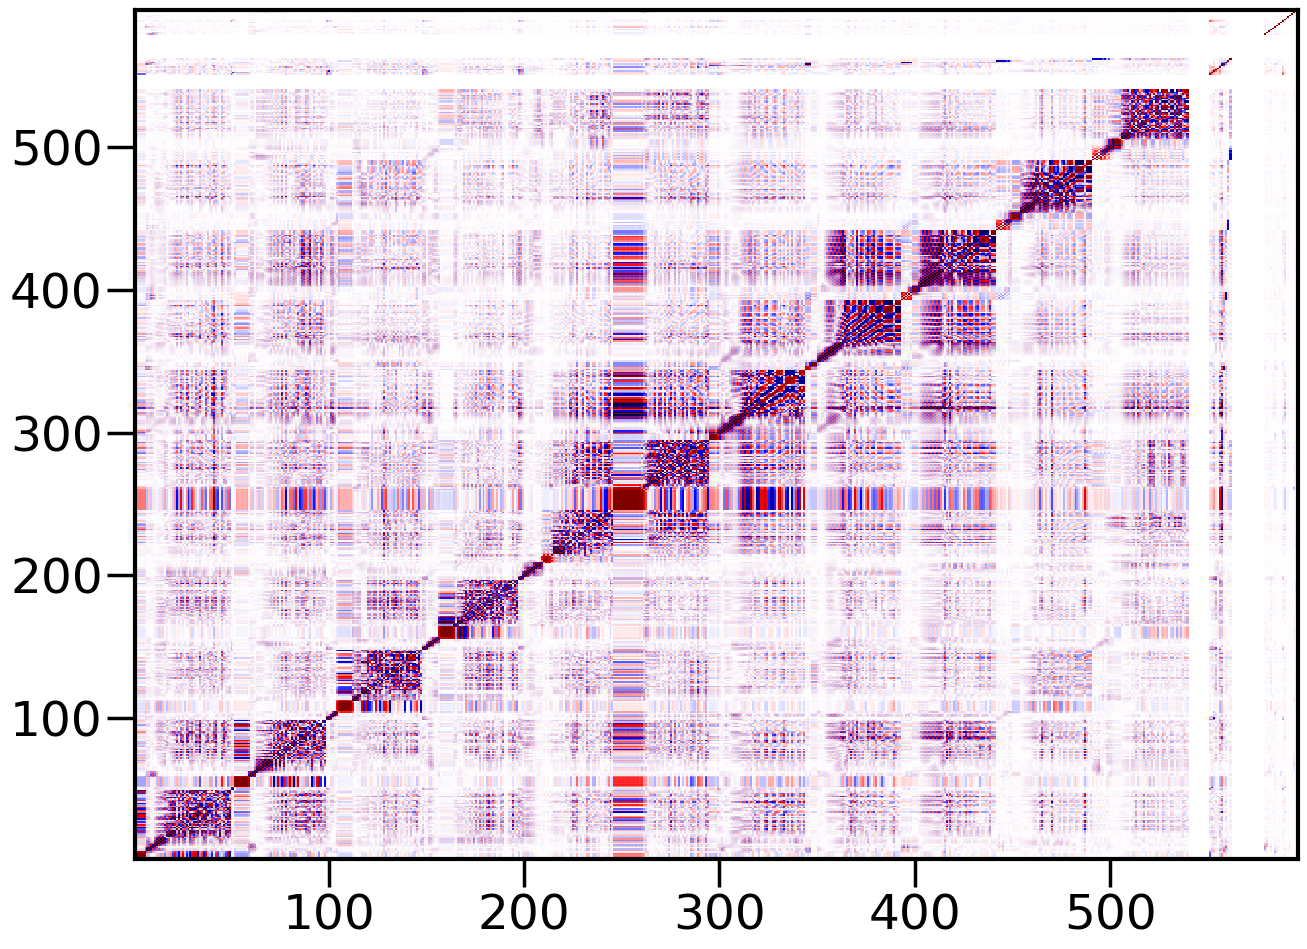

In [71]:
pcolor(corr,cmap='seismic',vmin=-1,vmax=1)
# loglog()
xlim(1,len(cov_pt))
ylim(1,len(cov_pt))

(1.0, 596.0)

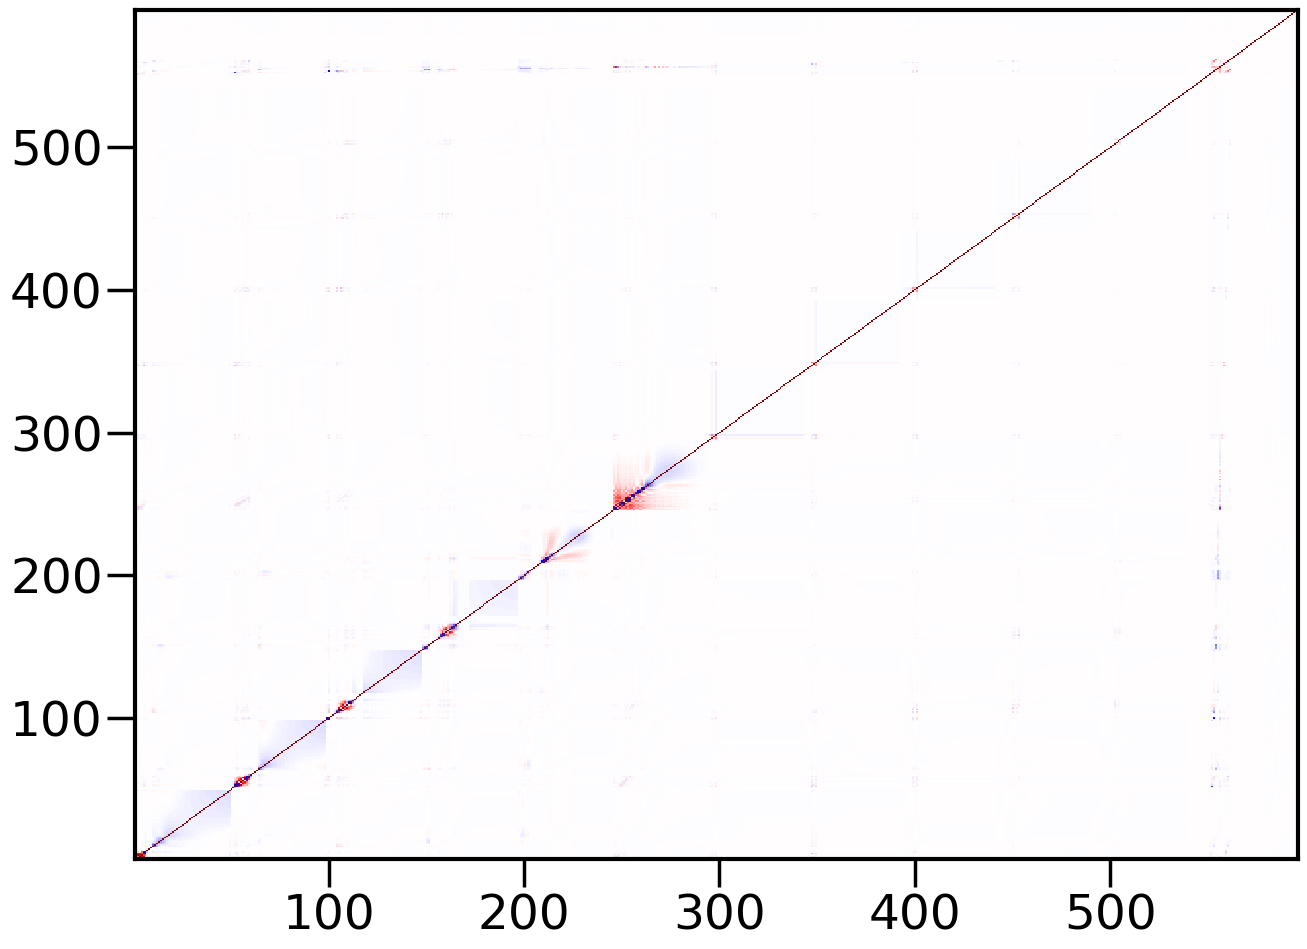

In [91]:
pcolor(corr_p,cmap='seismic',vmin=-1,vmax=1)
# loglog()
xlim(1,len(cov_pt))
ylim(1,len(cov_pt))

In [85]:
dd=np.diag(f_nz_all['cov_p_inv'])
dd_p=np.diag(f_nz_all['prior']['cov_p_inv'])
x=np.isclose(dd,0)
f_nz_all['params'][x], x.sum()

(array(['g_b_s_1_0', 'g_b_s_1_1', 'g_b_s_1_2', 'g_b_s_1_3', 'g_b_s_1_4',
        'g_b_sm_1_0', 'g_b_l_1_0', 'g_b_l_1_1', 'g_b_l_1_2', 'g_b_l_1_3',
        'g_b_l_1_4', 'g_b_lD_1_0', 'g_b_lD_1_1', 'g_b_lD_1_2',
        'g_b_lD_1_3', 'g_b_lD_1_4', 'g_b_lD_1_5', 'g_b_lD_1_6',
        'g_b_lD_1_7', 'g_b_lD_1_8', 'g_b_lD_1_9', 'g_b_lD_1_10',
        'g_b_lD_1_11', 'g_b_lD_1_12', 'g_b_lD_1_13', 'g_b_lD_1_14',
        'g_b_lD_1_15', 'g_b_lD_1_16'], dtype='<U32'),
 28)

In [81]:
ee=np.diag(cov_pt)
ee_p=np.diag(f_nz_all['prior']['cov_p'])


(200.0, 300.0)

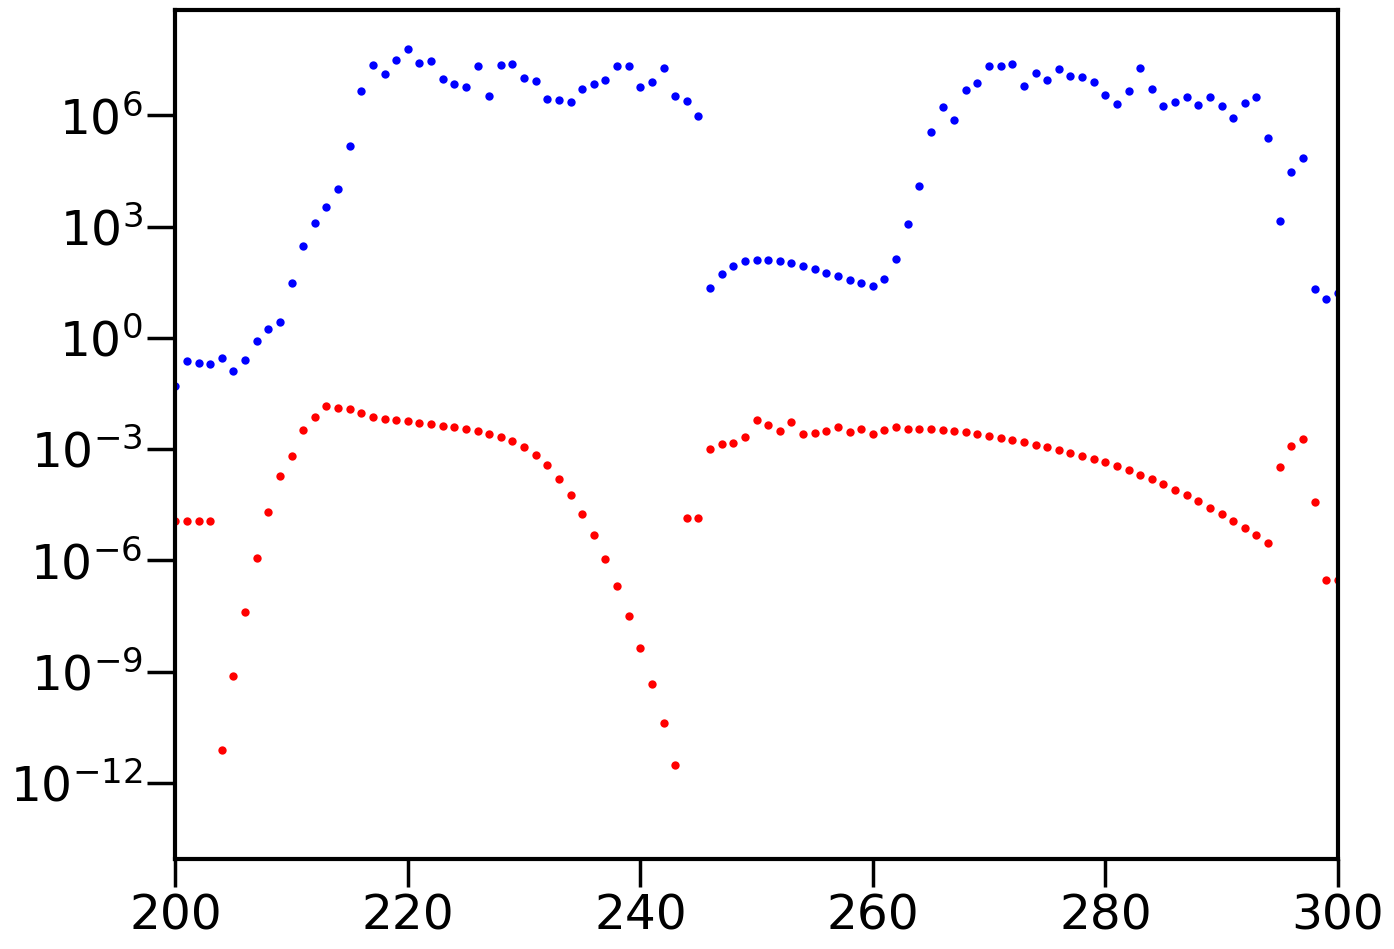

In [82]:
plot(ee,'b.')
plot(ee_p,'r.')
# loglog()
yscale('log')
xlim(200,300)

In [79]:
zb=cov_cl['z_bins']
for i in np.arange(5):
# plot(z_bins_kwargs['zs_bins'][i]['z'],pp_s[i],'--')
    plot(zb['zl_bins'][i]['z'],zb['zl_bins'][i]['nz'])
#     fill_between(zb['zl_bins'][i]['z'],zb['zl_bins'][i]['nz']-pp_l[i],zb['zl_bins'][i]['nz']+pp_l[i],alpha=0.2)
# yscale('log')
# xscale('log')
xlim(1,1.5)

KeyError: 'zl_bins'

../skylens/plot_fisher_tool.py:74: RuntimeWarning: invalid value encountered in sqrt
  self.par_sigma1D[i] = np.sqrt(np.diag(self.Cov_par[i]))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in sqrt
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


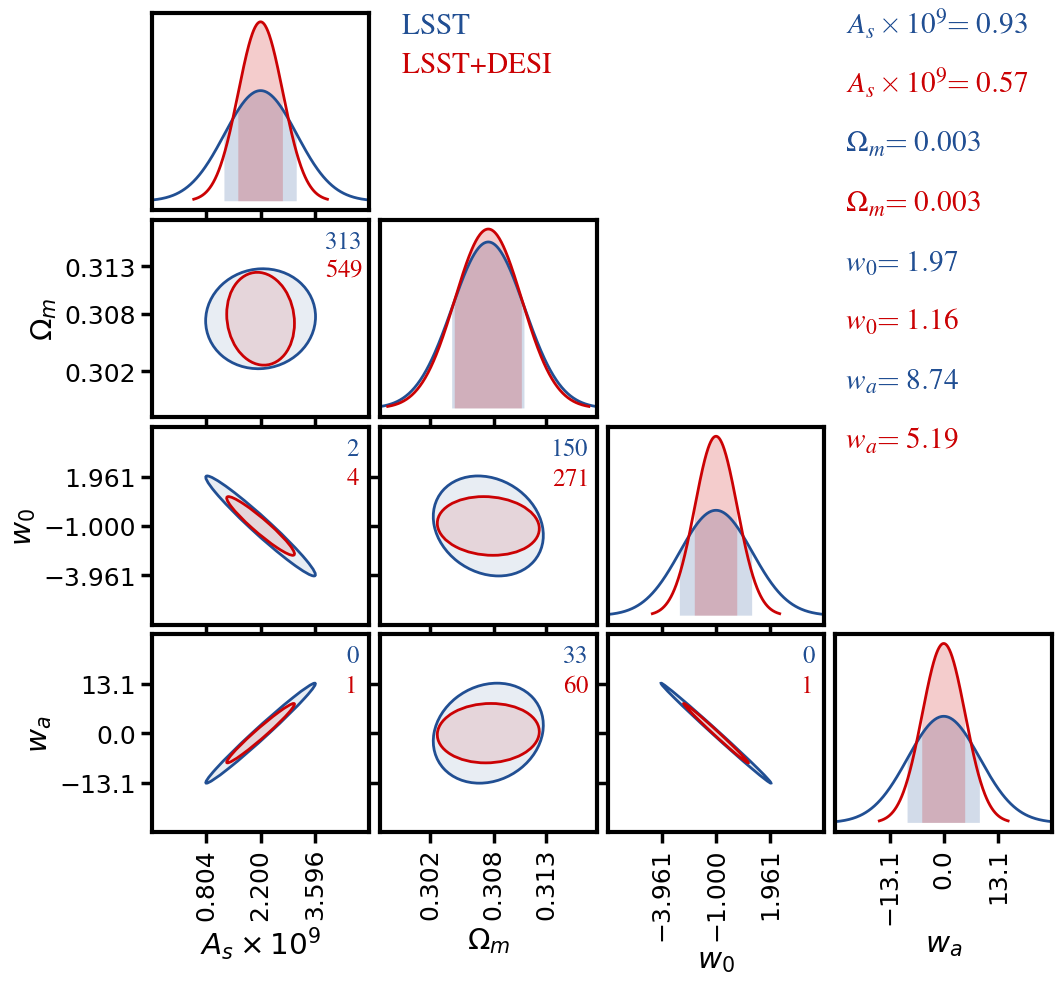

In [28]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['cov_p_inv'],1:f_nz_all['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI'})
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

../skylens/plot_fisher_tool.py:81: RuntimeWarning: divide by zero encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))


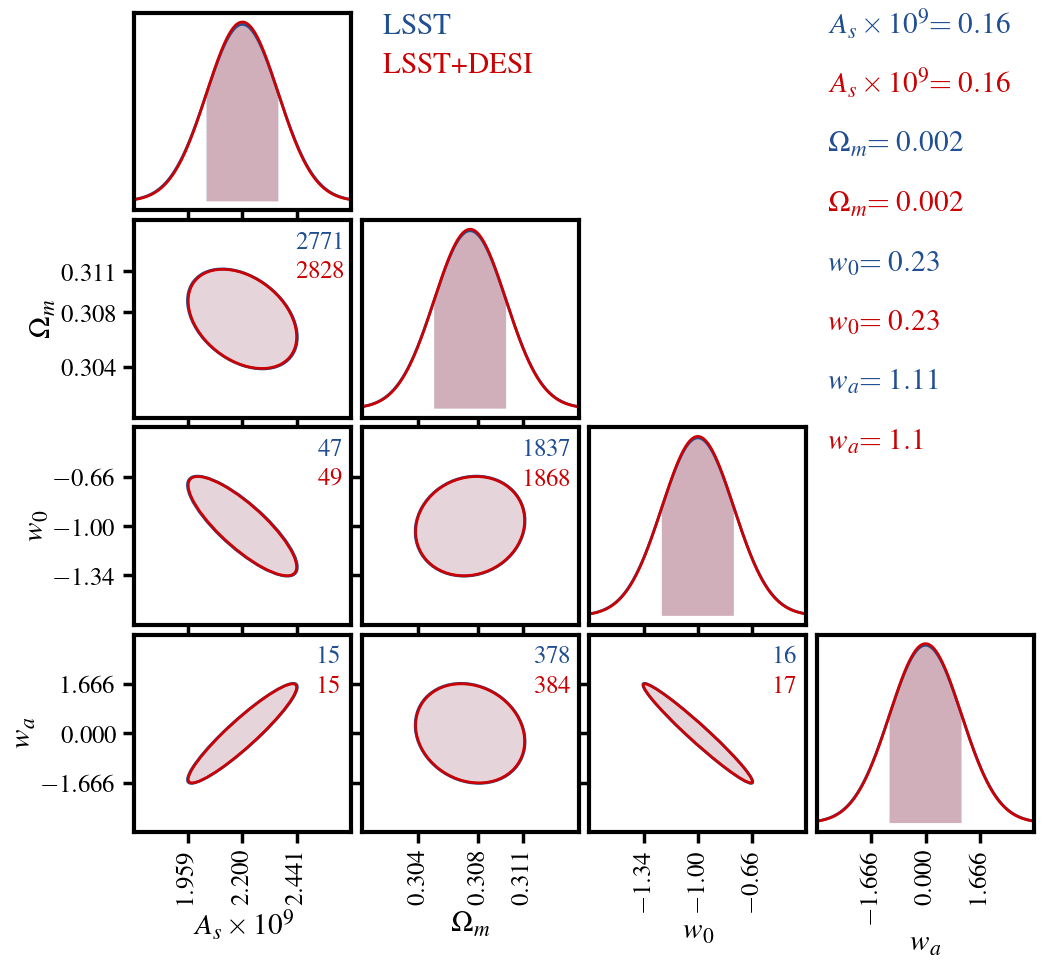

In [29]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['prior']['cov_p_inv'],1:f_nz_all['prior']['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI'})
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

../skylens/plot_fisher_tool.py:74: RuntimeWarning: invalid value encountered in sqrt
  self.par_sigma1D[i] = np.sqrt(np.diag(self.Cov_par[i]))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in sqrt
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: divide by zero encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))


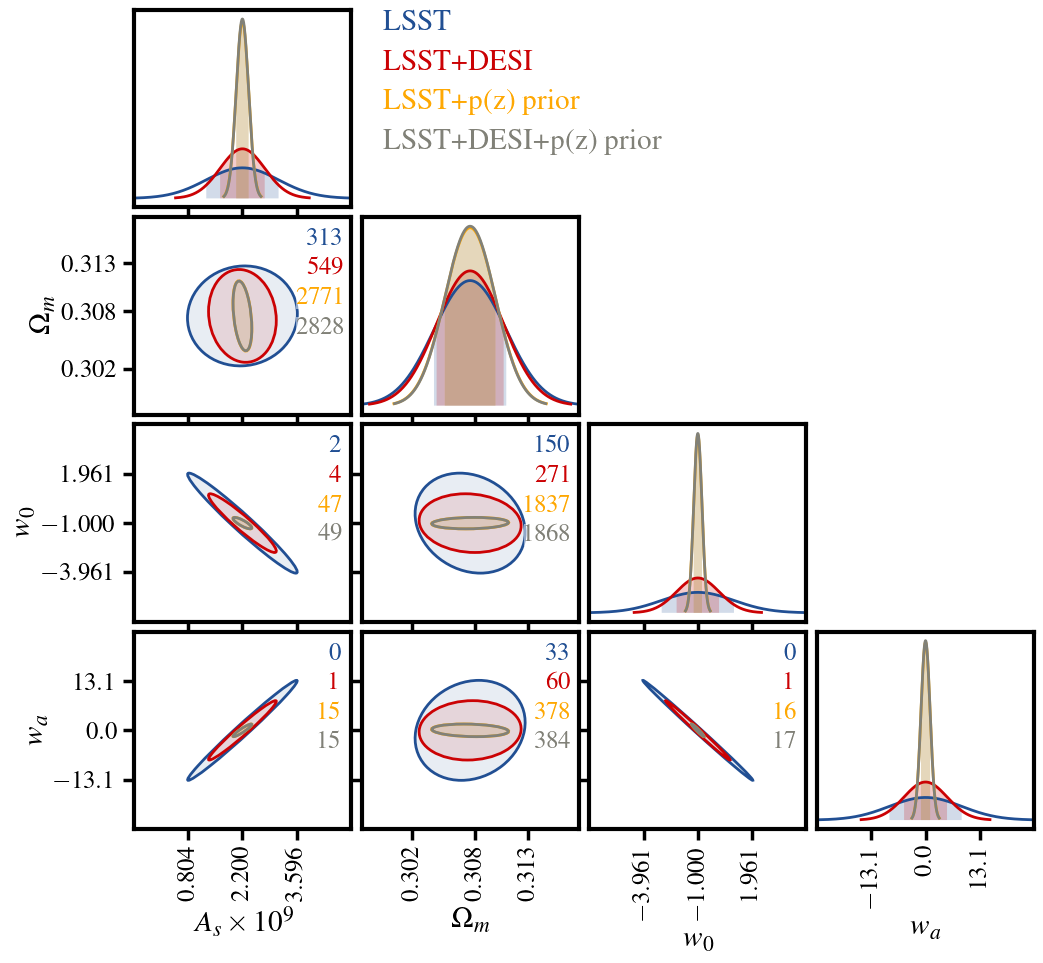

In [30]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['cov_p_inv'],1:f_nz_all['cov_p_inv'],
                            2:f_nz_all_lsst['prior']['cov_p_inv'],3:f_nz_all['prior']['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params'],
                         2:f_nz_all_lsst['params'],3:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI',
                                   2:'LSST+p(z) prior',3:'LSST+DESI+p(z) prior'},
                   print_par_error=False)
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

In [31]:
f_nz_all_lsst['model_deriv']['nz_s_0_17']

array([ 2.89356143e-08,  1.98293535e-08,  1.29739352e-08,  8.40161391e-09,
        5.35789695e-09,  3.46254255e-09,  2.30990158e-09,  1.61019029e-09,
        1.15826507e-09,  3.13026266e-08,  2.38281691e-08,  1.70742046e-08,
        1.09630169e-08,  7.18275407e-09,  4.52036581e-09,  2.85504705e-09,
        1.82753767e-09,  1.20972161e-09,  1.86987032e-08,  1.40063224e-08,
        1.08326241e-08,  7.92076224e-09,  4.94800877e-09,  3.28074318e-09,
        2.02640842e-09,  1.24688536e-09,  7.69372747e-10,  1.00277854e-08,
        7.93766702e-09,  5.91122814e-09,  4.63704379e-09,  3.17235372e-09,
        2.01693006e-09,  1.25870389e-09,  7.79719055e-10,  4.69935488e-10,
        2.54786652e-09,  2.15841241e-09,  1.63382316e-09,  1.23663194e-09,
        9.55891322e-10,  5.80827876e-10,  3.95397891e-10,  2.35071168e-10,
        1.40042540e-10,  3.20516704e-08,  2.09450038e-08,  1.37367142e-08,
        8.85748165e-09,  5.89694483e-09,  4.06976345e-09,  2.90500376e-09,
        2.10158081e-09,  